In [90]:
# install.packages("tripack") 
# install.packages("rjson") 
install.packages("raster")

also installing the dependencies ‘sp’, ‘Rcpp’




  There is a binary version available but the source version is later:
   binary source needs_compilation
sp  1.2-7  1.3-1              TRUE


The downloaded binary packages are in
	/var/folders/1x/4db6n8d95yx0hq9f13gp_fw40000gn/T//Rtmp0dQsYb/downloaded_packages


installing the source package ‘sp’



In [91]:
library(rjson)
library(igraph)
library(data.table)
library(tripack)
library(raster)

Loading required package: sp

Attaching package: ‘raster’

The following object is masked from ‘package:data.table’:

    shift



In [2]:
json_data <- fromJSON(paste(readLines("san_francisco_censustracts.json"), collapse=""))
ver_attr <- data.frame(matrix(ncol = 5, nrow = 0))
x <- c("id", "name", "x_coor", "y_coor", "coor")
colnames(ver_attr) <- x
length(json_data$features)
for (i in (1:length(json_data$features))){
    coor_len <- length(json_data$features[[i]]$geometry$coordinates[[1]][[1]])
    latitude <- 0
    longitude <- 0
    for (j in (1:coor_len)){
        latitude <- latitude + json_data$features[[i]]$geometry$coordinates[[1]][[1]][[j]][1]
        longitude <- longitude + json_data$features[[i]]$geometry$coordinates[[1]][[1]][[j]][2]
    }
    x <- latitude / coor_len
    y <- longitude / coor_len
    id <- json_data$features[[i]]$properties$MOVEMENT_ID
    name <- json_data$features[[i]]$properties$DISPLAY_NAME
    ver_attr[nrow(ver_attr) + 1,] = list(id, name, x, y, list(c(x, y)))
}
nrow(ver_attr)
head(ver_attr)
print(ver_attr[1,]$y_coor)

Warning message in readLines("san_francisco_censustracts.json"):
“incomplete final line found on 'san_francisco_censustracts.json'”

[1] 2710

[1] 2710

id,name,x_coor,y_coor,coor
1,"Sargent Creek, San Ardo",-120.7887,36.07163,"-120.78868, 36.07163"
2,"400 Northumberland Avenue, Redwood Oaks, Redwood City",-122.2194,37.46958,"-122.21941, 37.46958"
3,"18300 Sutter Boulevard, Morgan Hill",-121.6602,37.15048,"-121.66022, 37.15048"
4,"2700 Stoughton Way, Sheffield, Sacramento",-121.3428,38.57307,"-121.34285, 38.57307"
5,"3200 Huntsman Drive, Rosemont Park, Sacramento",-121.3617,38.55443,"-121.36171, 38.55443"
6,"100 Carlsbad Circle, Vacaville",-121.9484,38.36665,"-121.94843, 38.36665"


[1] 36.07163


In [3]:
id_sf = 2607
id_sc = 1968
print(ver_attr[2607,])
print(ver_attr[1968,])

       id                       name   x_coor   y_coor                 coor
2607 2607 100 Campus Drive, Stanford -122.176 37.42969 -122.17598, 37.42969
       id                         name    x_coor   y_coor                 coor
1968 1968 700 Meder Street, Santa Cruz -122.0646 36.97417 -122.06456, 36.97417


In [4]:
system.time(edge_list <- fread("san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv"))
nrow(edge_list)
edge_list <- edge_list[which(edge_list[,"month"]==12)]
nrow(edge_list)
head(edge_list)

edge_list <- edge_list[,c("sourceid","dstid","mean_travel_time"), drop = FALSE]
head(edge_list)
colnames(edge_list)[3] <- "weight"
head(edge_list)

   user  system elapsed 
  0.681   0.214   0.685 

[1] 1605957

[1] 538998

sourceid,dstid,month,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
1938,1952,12,596.69,327.27,530.23,1.60
1747,629,12,1454.81,536.38,1378.06,1.37
1872,1919,12,1227.01,391.90,1169.76,1.36
1871,1929,12,1005.54,308.34,965.06,1.32
81,2319,12,474.53,198.14,446.37,1.41
1873,1909,12,1164.51,461.02,1092.71,1.41


sourceid,dstid,mean_travel_time
1938,1952,596.69
1747,629,1454.81
1872,1919,1227.01
1871,1929,1005.54
81,2319,474.53
1873,1909,1164.51


sourceid,dstid,weight
1938,1952,596.69
1747,629,1454.81
1872,1919,1227.01
1871,1929,1005.54
81,2319,474.53
1873,1909,1164.51


In [5]:
graph <- graph.data.frame(edge_list, directed=F)
graph <- simplify(graph, remove.multiple = TRUE, remove.loops = TRUE,
  edge.attr.comb = list(weight="mean", "ignore"))
E(graph)
V(graph)
graph <- set.vertex.attribute(graph, name="location", value=list(c(0,0)))
graph <- set.vertex.attribute(graph, name="Display_name", value="b")

+ 311812/311812 edges from c8dfdf6 (vertex names):
 [1] 1938--1747 1938--1872 1938--1873 1938--232  1938--1891 1938--550 
 [7] 1938--1721 1938--176  1938--74   1938--1755 1938--1946 1938--1729
[13] 1938--722  1938--234  1938--251  1938--544  1938--1856 1938--338 
[19] 1938--175  1938--687  1938--818  1938--695  1938--682  1938--817 
[25] 1938--153  1938--272  1938--1455 1938--876  1938--131  1938--2147
[31] 1938--396  1938--2146 1938--2155 1938--52   1938--1269 1938--123 
[37] 1938--155  1938--235  1938--702  1938--1284 1938--1925 1938--2613
[43] 1938--1907 1938--1952 1938--1933 1938--957  1938--1906 1938--2513
[49] 1938--2515 1938--1870 1938--1928 1938--1923 1938--1597 1938--104 
[55] 1938--2488 1938--1893 1938--1875 1938--184  1938--65   1938--2169
+ ... omitted several edges

+ 1887/1887 vertices, named, from c8dfdf6:
   [1] 1938 1747 1872 1871 81   1873 232  1891 2423 650  680  542  604  660 
  [15] 1329 2421 1736 2021 550  1721 1700 176  536  74   288  169  99   1755
  [29] 646  2315 2322 2307 1390 641  1946 2357 1454 1729 2355 722  612  98  
  [43] 1074 1058 614  151  2341 1056 1745 1438 1473 1469 234  1098 1457 289 
  [57] 222  1059 1448 610  1097 1458 1484 315  1727 251  388  1748 544  1025
  [71] 1856 1726 1296 1749 338  1066 613  175  535  1451 2700 687  809  387 
  [85] 859  1739 1808 818  1838 738  695  685  682  817  627  339  605  153 
  [99] 609  647  645  272  284  1455 397  1409 876  1437 131  2210 347  1759
 [113] 2147 1359 2187 152  2113 396  2146 2155 2132 277  1258 369  52   2110
 [127] 1269 2157 1504 1456 1526 2111 123  1259 446  445  1514 1170 478  2401
+ ... omitted several vertices

In [6]:
for (i in 1:nrow(ver_attr)){
    V(graph)[which(V(graph)$name == ver_attr[i,]$id)]$Display_name <- ver_attr[i,]$name
    V(graph)[which(V(graph)$name == ver_attr[i,]$id)]$location <- ver_attr[i,]$coor
    V(graph)[which(V(graph)$name == ver_attr[i,]$id)]$x_coor <- ver_attr[i,]$x_coor
    V(graph)[which(V(graph)$name == ver_attr[i,]$id)]$y_coor <- ver_attr[i,]$y_coor
}
V(graph)[1]$name
V(graph)[1]$Display_name
V(graph)[1]$location
V(graph)[1]$x_coor
V(graph)[1]$y_coor

[1] "1938"

[1] "3300 Brodie Drive, South San Jose, San Jose"

[[1]]
[1] -121.82174   37.29051

[1] -121.8217

[1] 37.29051

In [7]:
graph.components <- clusters(graph)
ix <- which.max(graph.components$csize)
graph.giant <- induced.subgraph(graph, which(graph.components$membership == ix))
V(graph.giant)
E(graph.giant)

+ 1880/1880 vertices, named, from f35ba85:
   [1] 1938 1747 1872 1871 81   1873 232  1891 2423 650  680  542  604  660 
  [15] 1329 2421 1736 2021 550  1721 1700 176  536  74   288  169  99   1755
  [29] 646  2315 2322 2307 1390 641  1946 2357 1454 1729 2355 722  612  98  
  [43] 1074 1058 614  151  2341 1056 1745 1438 1473 1469 234  1098 1457 289 
  [57] 222  1059 1448 610  1097 1458 1484 315  1727 251  388  1748 544  1025
  [71] 1856 1726 1296 1749 338  1066 613  175  535  1451 2700 687  809  387 
  [85] 859  1739 1808 818  1838 738  695  685  682  817  627  339  605  153 
  [99] 609  647  645  272  284  1455 397  1409 876  1437 131  2210 347  1759
 [113] 2147 1359 2187 152  2113 396  2146 2155 2132 277  1258 369  52   2110
 [127] 1269 2157 1504 1456 1526 2111 123  1259 446  445  1514 1170 478  2401
+ ... omitted several vertices

+ 311802/311802 edges from f35ba85 (vertex names):
 [1] 1938--1747 1938--1872 1938--1873 1938--232  1938--1891 1938--550 
 [7] 1938--1721 1938--176  1938--74   1938--1755 1938--1946 1938--1729
[13] 1938--722  1938--234  1938--251  1938--544  1938--1856 1938--338 
[19] 1938--175  1938--687  1938--818  1938--695  1938--682  1938--817 
[25] 1938--153  1938--272  1938--1455 1938--876  1938--131  1938--2147
[31] 1938--396  1938--2146 1938--2155 1938--52   1938--1269 1938--123 
[37] 1938--155  1938--235  1938--702  1938--1284 1938--1925 1938--2613
[43] 1938--1907 1938--1952 1938--1933 1938--957  1938--1906 1938--2513
[49] 1938--2515 1938--1870 1938--1928 1938--1923 1938--1597 1938--104 
[55] 1938--2488 1938--1893 1938--1875 1938--184  1938--65   1938--2169
+ ... omitted several edges

In [8]:
ver_attr.triangles<-tri.mesh(V(graph.giant)$x_coor, V(graph.giant)$y_coor)

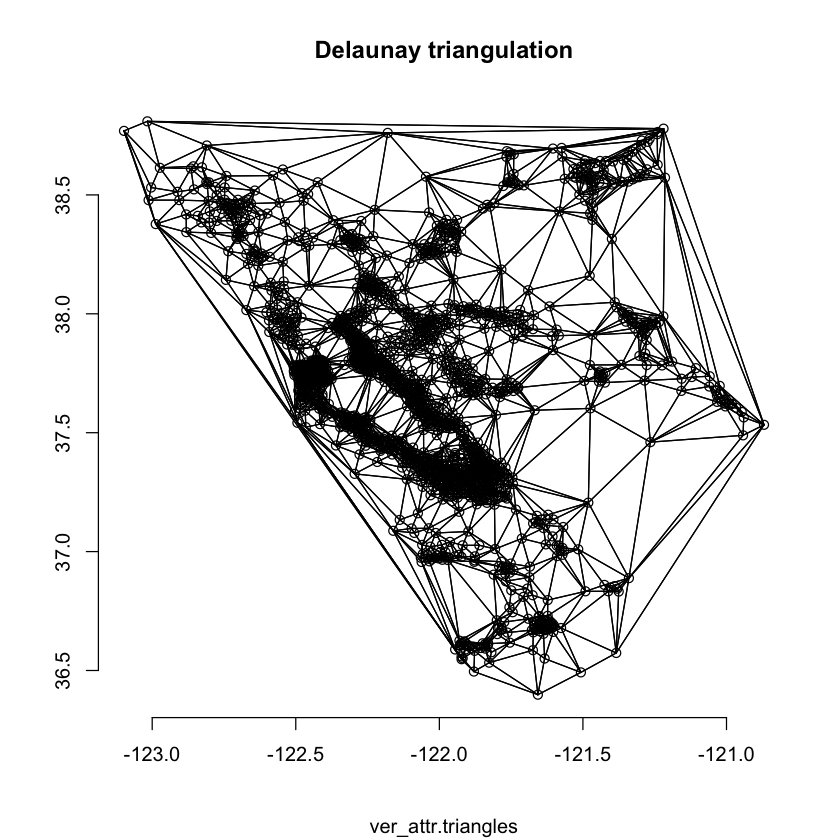

In [9]:
plot(ver_attr.triangles)
axis(1)
axis(2)

In [10]:
summary(ver_attr.triangles)

triangulation:
Call: tri.mesh(x = V(graph.giant)$x_coor, y = V(graph.giant)$y_coor) 
number of nodes: 1880 
number of arcs: 5627 
number of boundary nodes: 10 
number of triangles: 3748 
number of constraints: 0 

## Q12

In [16]:
neiblist <- neighbours(ver_attr.triangles)

2607 2607 100 Campus Drive, Stanford -122.176 37.42969
       id                         name    x_coor   y_coor
1968 1968 700 Meder Street, Santa Cruz -122.0646 36.97417

In [17]:
neiblist

[[1]]
[1]  423  523  914 1266 1274 1286

[[2]]
[1]   93  104  183  205  548  633  971  979 1054

[[3]]
[1]    4  285  558  743 1161 1231

[[4]]
[1]    3  285  341  558  939 1374 1626

[[5]]
[1]  151  486  515  884  954 1468

[[6]]
[1]   66  344  861 1035 1072

[[7]]
[1]  51 111 120 201 492 693

[[8]]
[1] 434 435 801 816 907

[[9]]
[1]   26  494 1008 1075 1149 1285

[[10]]
[1] 287 321 445 557 581

[[11]]
[1]  68  93 104 280 386 456

[[12]]
[1]   81  698  876 1169 1500

[[13]]
[1]  427  647 1008 1045 1130 1354

[[14]]
[1]   73  329  380  851 1258

[[15]]
[1]  213  354  469  825  873 1006

[[16]]
[1]  135  407  866 1067 1109 1288 1297

[[17]]
[1]   72  221  335  383  424 1039 1249 1334

[[18]]
[1]  162  684  717 1581 1604 1609 1712 1739

[[19]]
[1] 177 454 561 682

[[20]]
[1]   51   75  393  492  565 1133 1158 1301

[[21]]
[1]  151  543  778  884 1038 1185

[[22]]
[1]  24 238 472 603 798 828

[[23]]
[1]  197  246  487  517  521 1210

[[24]]
[1]   22  109  184  603  828  835 1153

[[25]]
[1]  158  367  869  953 1289

[[26]]
[1]    9  427  538 1008 1029 1149 1479 1579

[[27]]
[1]  396 1062 1155 1224 1342 1511

[[28]]
[1]   37  183  205  410 1054 1081 1505 1586

[[29]]
[1]  100  182  272  832 1114

[[30]]
[1] 349 405 465 517 521 581 945

[[31]]
[1]  583  805  954 1151 1322 1468

[[32]]
[1]  128  240  546  627 1369

[[33]]
[1] 1681 1701 1749 1772 1778 1796

[[34]]
[1] 148 234 243 336 362

[[35]]
[1] 516 610 788 813 886 901

[[36]]
[1]  550  811  986 1143 1160 1608

[[37]]
[1]  28 183 410 412 456 616 924

[[38]]
[1]   53  160  327  588  756 1135

[[39]]
[1]  326  598  625  689  890 1066

[[40]]
[1]  259  449  722  831  997 1064 1096

[[41]]
[1]  83 103 577 621 695 936

[[42]]
[1]   46  145  322 1196

[[43]]
[1]  168  324  352  711  930 1022

[[44]]
[1]  161  657  866 1067 1260

[[45]]
[1]  539  549  607 1063 1116 1261 1368

[[46]]
[1]   42   60   99  305  322 1196

[[47]]
[1]   87  637 1202 1627

[[48]]
[1]   60  355  478  481  701 1213

[[49]]
[1]  196  590  949 1135

[[50]]
[1]   86  152  242  604 1106

[[51]]
[1]    7   20  120  479  492 1301 1369 1519

[[52]]
[1]   92  112  530  560 1328 1376

[[53]]
[1]   38  265  309  327  375  633  756 1218

[[54]]
 [1]   61   84  158  284  311  959 1029 1094 1239 1319

[[55]]
[1]  514  572 1020 1111 1412

[[56]]
[1]  677 1013 1045 1354

[[57]]
[1]  372  385  550  780 1099

[[58]]
[1]  157  822 1062 1068 1155 1213

[[59]]
[1]   81  265  290  309 1147 1191

[[60]]
[1]   46   48  305  481  701 1196

[[61]]
[1]   54  174  959 1029 1479

[[62]]
[1]  196  572  588  949 1412

[[63]]
[1]  531  545  981 1013 1034 1261

[[64]]
[1]   88  359  565 1009 1165 1173

[[65]]
[1]  88  96 366 383 576 578

[[66]]
[1]    6  228  344  861  902  948 1243 1357

[[67]]
[1]   76  122  367  548  860  869  971 1021

[[68]]
[1]   11  280  386 1086 1300 1312

[[69]]
[1]  82  91 238 419 472 784

[[70]]
[1]  303  444  451  587  754  900 1205

[[71]]
[1]  102  394  454  682 1090 1373 1452

[[72]]
[1]   17  221  383 1249 1314

[[73]]
[1]   14  255  329  380 1281

[[74]]
[1]  206  376  416 1250

[[75]]
[1]   20  367  393  548  565 1079 1421

[[76]]
[1]   67  159  585  860  971 1422

[[77]]
[1]  887 1036 1059 1067 1297

[[78]]
[1]  118  419  801  998 1028 1330

[[79]]
[1]  153  182  272  404  853 1047 1208

[[80]]
[1]  277  391  876 1209 1346 1500

[[81]]
[1]   12   59  553  698 1147 1169 1191

[[82]]
[1]   69  314  419  435  784 1028

[[83]]
[1]  41 131 407 478 695 936

[[84]]
[1]   54  284  537  538 1029 1319

[[85]]
[1]  329  453  864  933 1322 1483

[[86]]
[1]   50  152  242  591 1132 1356

[[87]]
[1]   47  302  637 1439 1627

[[88]]
[1]   64   65   96  565  578 1009 1158

[[89]]
[1]  185  339  503  929  976 1401

[[90]]
[1]  133  306  809  819 1340 1433

[[91]]
[1]  69 334 472 784 798 833

[[92]]
[1]   52  112 1037 1123 1148 1333 1376

[[93]]
[1]   2  11 104 183 456

[[94]]
[1]  270  648  690  967 1081 1127 1162 1505

[[95]]
[1]  163  569  863  923 1219 1251 1276

[[96]]
[1]   65   88  576 1158

[[97]]
[1] 223 427 647 654 7

In [18]:
V(graph.giant)[1]$name

[1] "1938"

In [19]:
euc_dist <- as.matrix(dist(cbind(x=ver_attr.triangles$x, y=ver_attr.triangles$y)))

In [20]:
euc_dist

,1,2,3,4,5,6,7,8,9,10,⋯,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880
1,0.00000000,0.55003019,0.07796279,0.09327203,0.76480846,0.06431209,0.35219169,0.11114736,0.47271613,0.74767386,⋯,0.8454568,1.953457,0.8622511,0.8582760,0.8114325,0.9000116,0.4207815,0.6007763,0.9767462,1.5133372
2,0.55003019,0.00000000,0.52490784,0.52981939,0.22269661,0.61429197,0.19812374,0.44696670,0.23871169,0.21782812,⋯,1.0607681,1.441818,1.0472275,1.3366946,1.1274522,1.3041674,0.9121291,0.8806949,0.7734351,1.1937821
3,0.07796279,0.52490784,0.00000000,0.01727752,0.74509851,0.11701489,0.32820187,0.13240049,0.48297668,0.73205336,⋯,0.9206406,1.949103,0.9360503,0.8415334,0.8893352,0.9759114,0.4039217,0.6769900,1.0174281,1.5451883
4,0.09327203,0.52981939,0.01727752,0.00000000,0.75080665,0.12618639,0.33419273,0.14805902,0.49483572,0.73865618,⋯,0.9372820,1.957372,0.9529319,0.8304751,0.9045877,0.9885965,0.3936264,0.6933506,1.0329552,1.5595197
5,0.76480846,0.22269661,0.74509851,0.75080665,0.00000000,0.82904941,0.41690073,0.65779348,0.36140666,0.04299001,⋯,1.1544268,1.221141,1.1310132,1.5586789,1.2519559,1.4523180,1.1348111,1.0094946,0.7212855,1.0529436
6,0.06431209,0.61429197,0.11701489,0.12618639,0.82904941,0.00000000,0.41638555,0.17360415,0.53243309,0.81168338,⋯,0.8431144,2.015370,0.8638987,0.8066113,0.7939841,0.8656335,0.3722360,0.5959429,1.0194263,1.5609376
7,0.35219169,0.19812374,0.32820187,0.33419273,0.41690073,0.41638555,0.00000000,0.25168755,0.22526823,0.40464676,⋯,0.9603055,1.626293,0.9563462,1.1533899,0.9969776,1.1501986,0.7225162,0.7528850,0.8183908,1.2981363
8,0.11114736,0.44696670,0.13240049,0.14805902,0.65779348,0.17360415,0.25168755,0.00000000,0.36233315,0.63915012,⋯,0.8274848,1.842342,0.8372158,0.9646274,0.8202159,0.9380992,0.5262139,0.5918131,0.8850299,1.4140577
9,0.47271613,0.23871169,0.48297668,0.49483572,0.36140666,0.53243309,0.22526823,0.36233315,0.00000000,0.32855588,⋯,0.8240068,1.485708,0.8090889,1.3242507,0.9009058,1.0926553,0.8860481,0.6554124,0.5932636,1.0807899
10,0.74767386,0.21782812,0.73205336,0.73865618,0.04299001,0.81168338,0.40464676,0.63915012,0.32855588,0.00000000,⋯,1.1136108,1.224622,1.0896263,1.5534344,1.2135639,1.4164721,1.1261954,0.9719825,0.6803134,1.0239466


In [21]:
time = distances(graph.giant)

In [180]:
#id1, id2, dis, flow
el <- matrix(0, nrow = 0, ncol = 4)
for(x in c(1:length(neiblist))){
    for(y in c(1:length(neiblist[[x]]))){
        nb_id = neiblist[[x]][y]
        dis = euc_dist[x, nb_id]*69
        x_id = strtoi(V(graph.giant)[x]$name) #convert to int
        y_id = strtoi(V(graph.giant)[nb_id]$name)
        if(x_id %in% V(graph.giant)$name && y_id %in% V(graph.giant)$name){
            t = time[which(V(graph.giant)$name == x_id), which(V(graph.giant)$name == y_id)] 
            speed = dis/t
            flow = 2*(3600/((0.003+2*speed)/speed))
        }
        else{
            print(x)
            print(nb_id)
            flow = 0
        }   
        el <- rbind(el, c(x_id, y_id, dis, flow))
    }
}

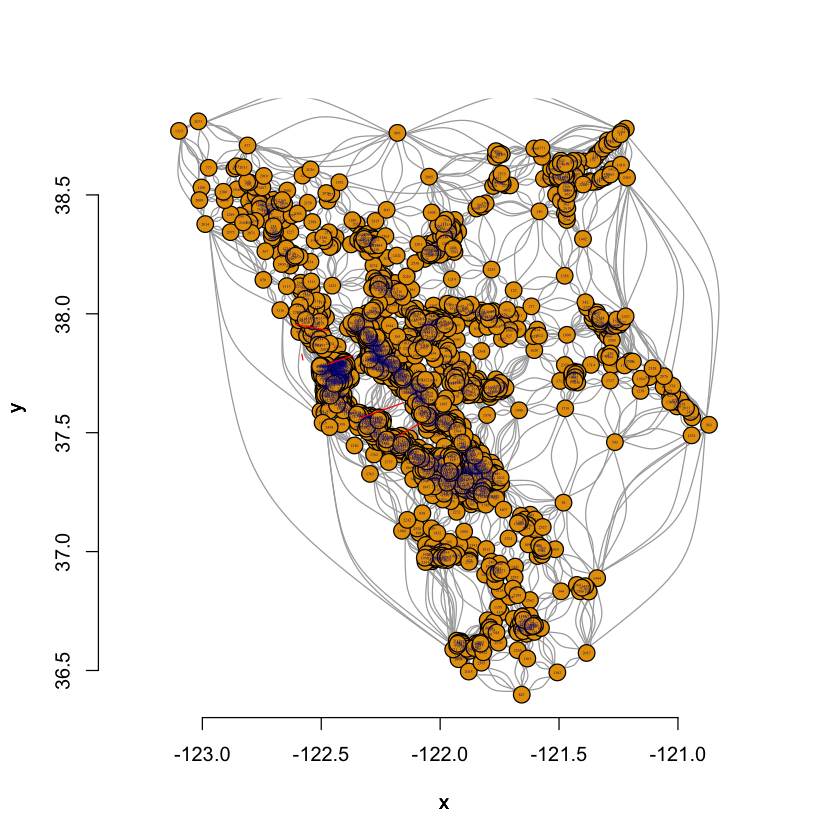

In [181]:
start <- c()
end <- c()
for(x in c(1:nrow(el))){
    if(el[x,4]>0){
        start <- c(start, el[x,1])
        end <- c(end, el[x,2])
    }
}
df<-data.frame("from" = start, "to"=end)
id <- unique(as.vector(rbind(start,end)))
id_name = as.character(id)
lon <- ver_attr[id,3]
lat <- ver_attr[id,4]
meta<-data.frame("name" = id_name, "lon"=lon, "lat"=lat)
g<- graph.data.frame(df, directed=F, vertices=meta)
lo <- as.matrix(meta[,2:3])
plot(g, layout=lo,rescale=F,axes=TRUE,ylim=c(min(lat),max(lat)),xlim=c(min(lon),max(lon)),vertex.size=5, vertex.label.cex=0.2)
# Golden Gate Bridge
x = c(-122.475,-122.479)
y = c(37.806, 37.83)
par(new=TRUE)
plot(x,y,col="red",pch=20,axes=F,ylim=c(min(lat),max(lat)),xlim=c(min(lon),max(lon)),type="l")
# Richmond, San Rafael Bridge
x = c(-122.501,-122.387)
y = c(37.956,37.93)
par(new=TRUE)
plot(x,y,col="red",pch=20,axes=F,ylim=c(min(lat),max(lat)),xlim=c(min(lon),max(lon)),type="l")
# San Mateo Bridge
x = c(-122.273,-122.122)
y = c(37.563, 37.627)
par(new=TRUE)
plot(x,y,col="red",pch=20,axes=F,ylim=c(min(lat),max(lat)),xlim=c(min(lon),max(lon)),type="l")
# Dambarton Bridge
x = c(-122.142,-122.067)
y = c(37.486,37.54)
par(new=TRUE)
plot(x,y,col="red",pch=20,axes=F,ylim=c(min(lat),max(lat)),xlim=c(min(lon),max(lon)),type="l")
# San Francisco - Oakland Bay Bridge
x = c(-122.388, -122.302)
y = c(37.788, 37.825)
par(new=TRUE)
plot(x,y,col="red",pch=20,axes=F,ylim=c(min(lat),max(lat)),xlim=c(min(lon),max(lon)),type="l")

In [225]:
#id1, id2, dis, flow
el <- matrix(0, nrow = 0, ncol = 4)
for(x in c(1:length(neiblist))){
    for(y in c(1:length(neiblist[[x]]))){
        nb_id = neiblist[[x]][y]
        dis = euc_dist[x, nb_id]*69
        x_id = strtoi(V(graph.giant)[x]$name) #convert to int
        y_id = strtoi(V(graph.giant)[nb_id]$name)
        if(x_id %in% V(graph.giant)$name && y_id %in% V(graph.giant)$name){
            t = time[which(V(graph.giant)$name == x_id), which(V(graph.giant)$name == y_id)]
            if(t<2500) {
                speed = dis/t
                flow = 2*(3600/((0.003+2*speed)/speed))
            } else {
                flow = 0
            }
        }
        else{
            print(x)
            print(nb_id)
            flow = 0
        }
        el <- rbind(el, c(x_id, y_id, dis, flow))
    }
}

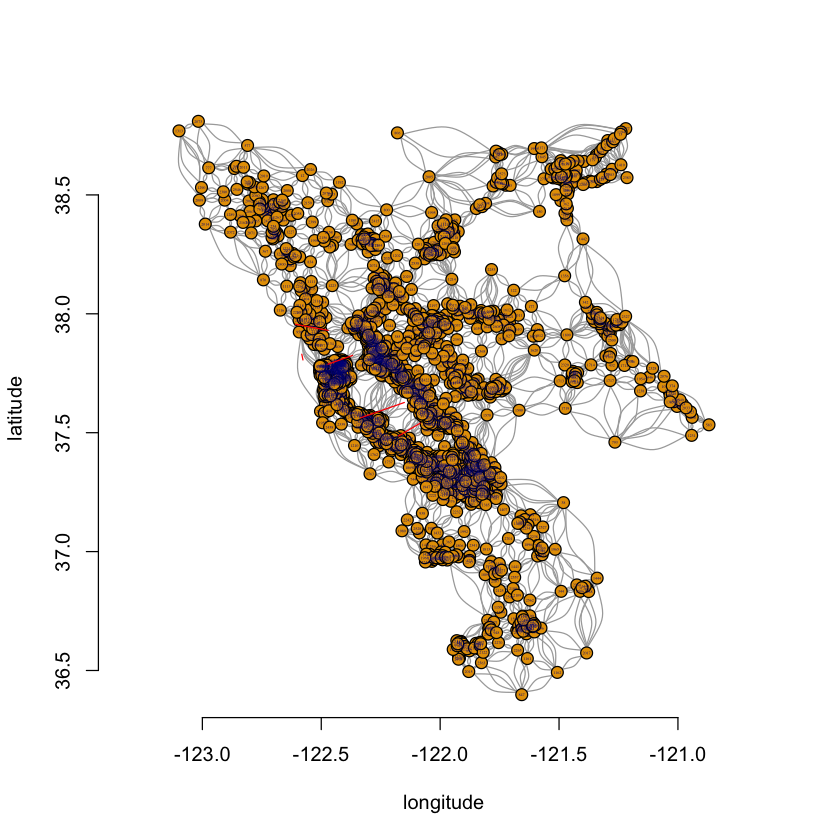

In [232]:
start <- c()
end <- c()
for(x in c(1:nrow(el))){
    if(el[x,4]>0){
        start <- c(start, el[x,1])
        end <- c(end, el[x,2])
    }
}
df<-data.frame("from" = start, "to"=end)
id <- unique(as.vector(rbind(start,end)))
id_name = as.character(id)
lon <- ver_attr[id,3]
lat <- ver_attr[id,4]
meta<-data.frame("name" = id_name, "lon"=lon, "lat"=lat)
g<- graph.data.frame(df, directed=F, vertices=meta)
lo <- as.matrix(meta[,2:3])
plot(g, layout=lo,rescale=F,axes=TRUE,ylim=c(min(lat),max(lat)),xlim=c(min(lon),max(lon)),vertex.size=5, vertex.label.cex=0.2,xlab='longitude',ylab='latitude')
# Golden Gate Bridge
x = c(-122.475,-122.479)
y = c(37.806, 37.83)
par(new=TRUE)
plot(x,y,col="red",pch=20,axes=F,ylim=c(min(lat),max(lat)),xlim=c(min(lon),max(lon)),type="l",xlab='',ylab='')
# Richmond, San Rafael Bridge
x = c(-122.501,-122.387)
y = c(37.956,37.93)
par(new=TRUE)
plot(x,y,col="red",pch=20,axes=F,ylim=c(min(lat),max(lat)),xlim=c(min(lon),max(lon)),type="l",xlab='',ylab='')
# San Mateo Bridge
x = c(-122.273,-122.122)
y = c(37.563, 37.627)
par(new=TRUE)
plot(x,y,col="red",pch=20,axes=F,ylim=c(min(lat),max(lat)),xlim=c(min(lon),max(lon)),type="l",xlab='',ylab='')
# Dambarton Bridge
x = c(-122.142,-122.067)
y = c(37.486,37.54)
par(new=TRUE)
plot(x,y,col="red",pch=20,axes=F,ylim=c(min(lat),max(lat)),xlim=c(min(lon),max(lon)),type="l",xlab='',ylab='')
# San Francisco - Oakland Bay Bridge
x = c(-122.388, -122.302)
y = c(37.788, 37.825)
par(new=TRUE)
plot(x,y,col="red",pch=20,axes=F,ylim=c(min(lat),max(lat)),xlim=c(min(lon),max(lon)),type="l",xlab='',ylab='')

In [233]:
el[,1]=as.character(el[,1]) #Because the vertex IDs in this dataset are numbers, we make sure igraph knows these should be treated as characters. Otherwise, it'll create problems (see page on data import)
el[,2]=as.character(el[,2])
el=as.matrix(el) #igraph needs the edgelist to be in matrix format
g=graph.edgelist(el[,1:2]) #We first greate a network from the first two columns, which has the list of vertices
E(g)$weight=as.numeric(el[,3]) #We then add the edge weights to this network by assigning an edge attribute called 'weight'.
E(g)$capacity=as.numeric(el[,4])

In [234]:
vcount(g)
ecount(g)

[1] 1880

[1] 11254

## Q13

In [235]:
max_flow(g, source=V(g)[which(V(g)$name == id_sf)], V(g)[which(V(g)$name == id_sc)])

$value
[1] 15014.96

$flow
    [1] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
    [6] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [11] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [16] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [21] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [26] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [31] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [36] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [41] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [46] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [51] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [56] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [61] 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
   [66] 0.000000e+00 0.0

In [22]:
max_flow(g, source=V(g)[8], V(g)[52])

$value
[1] 17449.83

$flow
    [1]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
    [6]  0.000000e+00  2.622204e+03  6.582620e+02  2.257444e+03  2.601771e+03
   [11]  0.000000e+00  3.371405e+03  2.858508e+03  2.831197e+03  2.308651e+03
   [16]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [21]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [26]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [31]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [36]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [41]  3.579519e+00  3.350308e+03  0.000000e+00  0.000000e+00  0.000000e+00
   [46]  0.000000e+00  2.910926e+03  3.062664e+03  0.000000e+00  8.522642e+02
   [51]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [56]  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
   [61]  0.000000e+00  0.000000e+00  

In [23]:
edge_disjoint_paths(g, which(V(g)$name == id_sf), which(V(g)$name == id_sc))

[1] 5

In [26]:
distances(graph.giant, v = which(V(g)$name == id_sf), to = which(V(g)$name == id_sc))

,1972
1437,5085.53


In [ ]:
# a = all_simple_paths(g, which(V(g)$name == id_sf, which(V(g)$name == id_sc)))

In [ ]:
gg <- make_ring(10)
a = all_simple_paths(gg, 1, 5)

In [ ]:
degree(g, mode = "out")[which(V(g)$name == id_sf)]

In [ ]:
degree(g, mode = "in")[which(V(g)$name == id_sc)]

In [ ]:
plot(g, vertex.size=3, vertex.label=NA, edge.arrow.size=0.2, edge.width=0.05)